
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

Some of the important variables for scc_proj_2025:

- *TECHNOLOGY*: 5nm nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1.1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



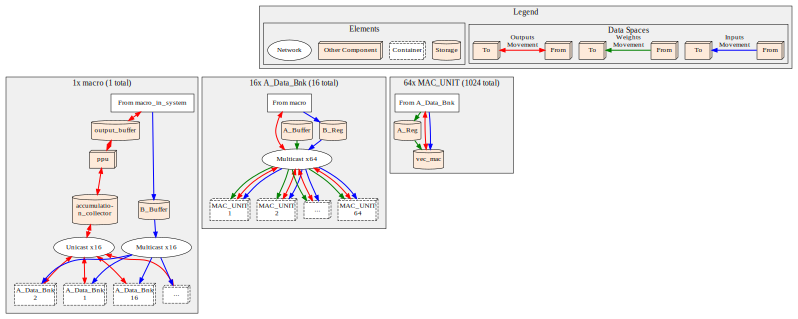

In [27]:
from _tests import scripts
from scripts.notebook_utils import *
import helper_functions



display_markdown(
    f"""
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

{get_important_variables_markdown('scc_proj_2025')}

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("scc_proj_2025", ignore=DIAGRAM_DEFAULT_IGNORE))

In [28]:
result = run_test("scc_proj_2025", "test_mm_energy_breakdown")



   ### Matrix Multiply Energy Breakdown 

   This test evaluates the energy breakdown for a matrix multiply workload
   where both input matrix A and weight matrix B are drawn from a Gaussian
   distribution with inputted sparsity.
   
   Possible Parameters for future:
       bitwdith (int) (optional): size of input bits, if you're using INT4/INT4-VSQ or INT8
       sparsity (float) (optional): decimal sparsity amount, 0.5 == 50% sparsity
       std (float) (optional): standard deviationi for Gaussian distribution
   

Error processing spec with scc_proj_2025, None, simple_matmul, {'INPUT_BITS': 4, 'WEIGHT_BITS': 4, 'OUTPUT_BITS': 4}


RuntimeError: 

========================================================================================================================
Timeloop mapper failed with return code 0. Please check the output files in /home/workspace/scripts/../outputs/11841.140417818308608 for more information. To debug, you can edit the file:
	/home/workspace/scripts/../outputs/11841.140417818308608/parsed-processed-input.yaml
and run 
	tl mapper /home/workspace/scripts/../outputs/11841.140417818308608/parsed-processed-input.yaml
to see the error. If you're running the mapper and Timeloop can't find a vaild mapping, try setting 'diagnostics: true' in the mapper input specification.

In [ ]:
# Make energy breakdown table NOT Quantized
energies = result.per_component_energy
print(energies)

normalization_component = "vec_mac"

normalization_factor = energies[normalization_component]

normalized_energy_breakdown = { k: v/normalization_factor for k,v in energies.items()}

print(helper_functions.generate_pd_table([normalized_energy_breakdown], ["INT4"]))

In [7]:
# Make energy breakdown table Quantized
energies = result[1].per_component_energy

normalization_component = "vec_mac"

normalization_factor = energies[normalization_component]

normalized_energy_breakdown = { k: v/normalization_factor for k,v in energies.items()}

print(helper_functions.generate_pd_table([normalized_energy_breakdown], ["INT4"]))

TypeError: 'MacroOutputStats' object is not subscriptable

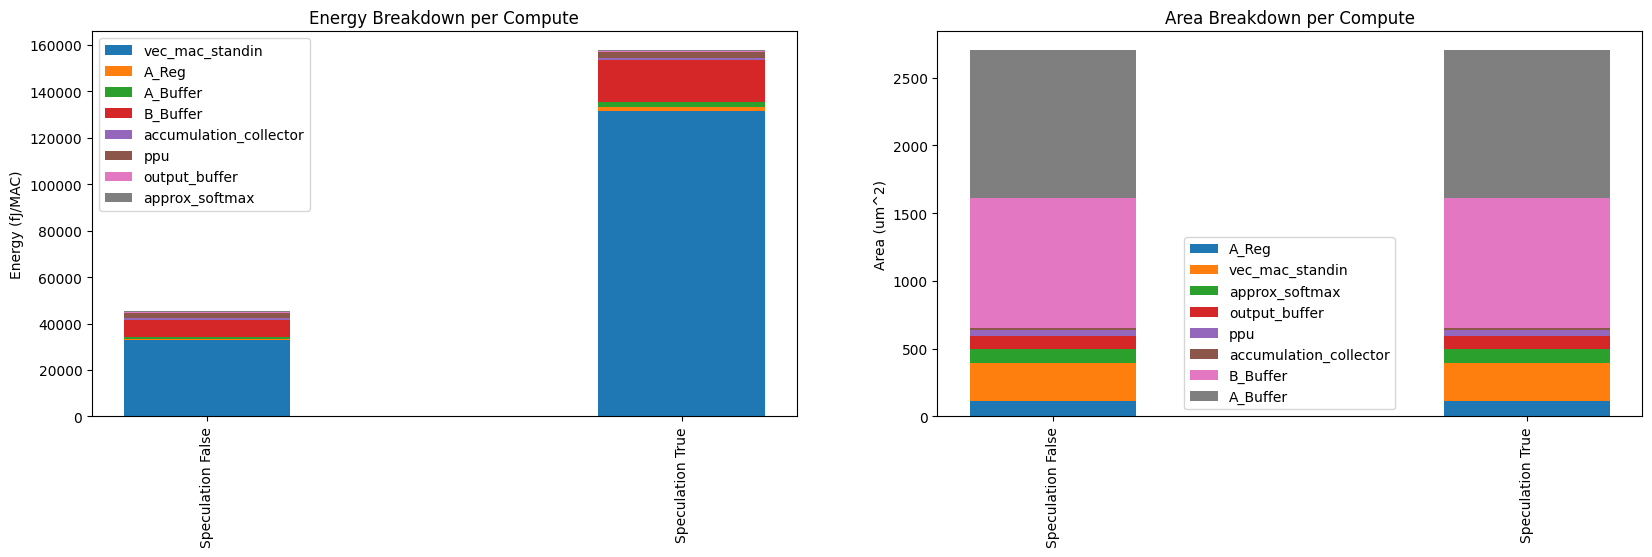

In [5]:
# Make graphs
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown per Compute",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown per Compute",
    ax=axs[1]
)



In [23]:
# !tl mapper /home/workspace/scripts/../outputs/267.140641013174272/parsed-processed-input.yaml 
print(helper_functions.generate_histograms(4,2,.49))

new_changed
[0.00024853490609654, 0.0015485636456784417, 0.006028564645316072, 0.01774794137125292, 0.04139062089992378, 0.07699483937072811, 0.11148383710904797, 0.49, 0.1111588299241525, 0.07707768433942695, 0.0412886578615252, 0.017276362318659488, 0.00596483774631696, 0.0014975821264791513, 0.00029314373539591896]
